In [1]:
pip install pycoingecko dune-client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00


In [2]:
from dune_client.client import DuneClient
from google.colab import userdata
userdata.get('DUNE_API_KEY')



dune_api_key = userdata.get('DUNE_API_KEY')
dune = DuneClient(dune_api_key)
base_daily_emissions = dune.get_latest_result_dataframe(4354659)
print("base emissions & user emissions loaded")
deposits = dune.get_latest_result_dataframe(4003406)
print("deposits loaded")
borrows= dune.get_latest_result_dataframe(4301345)
print("borrows loaded")

base emissions & user emissions loaded
deposits loaded
borrows loaded


In [3]:
base_daily_emissions.head()

,day,unique_recipients,num_transfers,daily_ion_amount,cumulative_ion_distributed
0,2024-12-01 00:00:00.000 UTC,28,64,81166.172561,2.536469e+06
1,2024-11-30 00:00:00.000 UTC,29,64,73680.761145,2.455303e+06
2,2024-11-29 00:00:00.000 UTC,17,31,25143.996792,2.381622e+06
3,2024-11-28 00:00:00.000 UTC,22,61,19281.778385,2.356478e+06
4,2024-11-27 00:00:00.000 UTC,32,77,67596.875595,2.337197e+06


In [4]:
deposits.head()

,date,vaultName,mintedAmount_USD
0,2024-01-23 00:00:00.000 UTC,ionUSDCm,4.737363
1,2024-01-23 00:00:00.000 UTC,ionWETHm,90.407717
2,2024-01-24 00:00:00.000 UTC,ionUSDCm,22.020210
3,2024-01-24 00:00:00.000 UTC,ionWETHm,105.738968
4,2024-01-25 00:00:00.000 UTC,ionUSDCm,3.022273


In [5]:
borrows.head()

,date,vaultName,daily_borrowed_amount_usd,total_borrowed_in_vault_usd
0,2024-12-04,ionAEROb,0.0,151126.6276818358
1,2024-12-04,ionEURCb,0.0,42086.810416648055
2,2024-12-04,ionLUSDo,0.0,4.098312097731178
3,2024-12-04,ionMBTCm,0.0,642863.7970879909
4,2024-12-04,ionMODEmi,0.0,370505.71258720674


Revenue Calculation Breakdown:
--------------------------------------------------
ionAEROb:
Borrowed: $142,733.94
Borrow APR: 10.2%
Daily Protocol Revenue: $3.99

ionEURCb:
Borrowed: $45,497.10
Borrow APR: 12.3%
Daily Protocol Revenue: $1.53

ionRSRb:
Borrowed: $174,398.53
Borrow APR: 0.2%
Daily Protocol Revenue: $0.10

ionUSDCb:
Borrowed: $1,704,861.42
Borrow APR: 45.4%
Daily Protocol Revenue: $212.06

ionUSDplusb:
Borrowed: $838.49
Borrow APR: 13.2%
Daily Protocol Revenue: $0.03

ionUSDzb:
Borrowed: $236,295.43
Borrow APR: 7.2%
Daily Protocol Revenue: $4.66

ionWETHb:
Borrowed: $1,055,005.33
Borrow APR: 10.8%
Daily Protocol Revenue: $31.22

ioncbBTCb:
Borrowed: $10,984.70
Borrow APR: 0.7%
Daily Protocol Revenue: $0.02

ioncbETHb:
Borrowed: $4,858.00
Borrow APR: 0.1%
Daily Protocol Revenue: $0.00

ioneUSDb:
Borrowed: $877,201.77
Borrow APR: 29.1%
Daily Protocol Revenue: $69.94

ionsUSDzb:
Borrowed: $51,734.52
Borrow APR: 7.3%
Daily Protocol Revenue: $1.03

ionuSOLb:
Borrowed: $61,770.

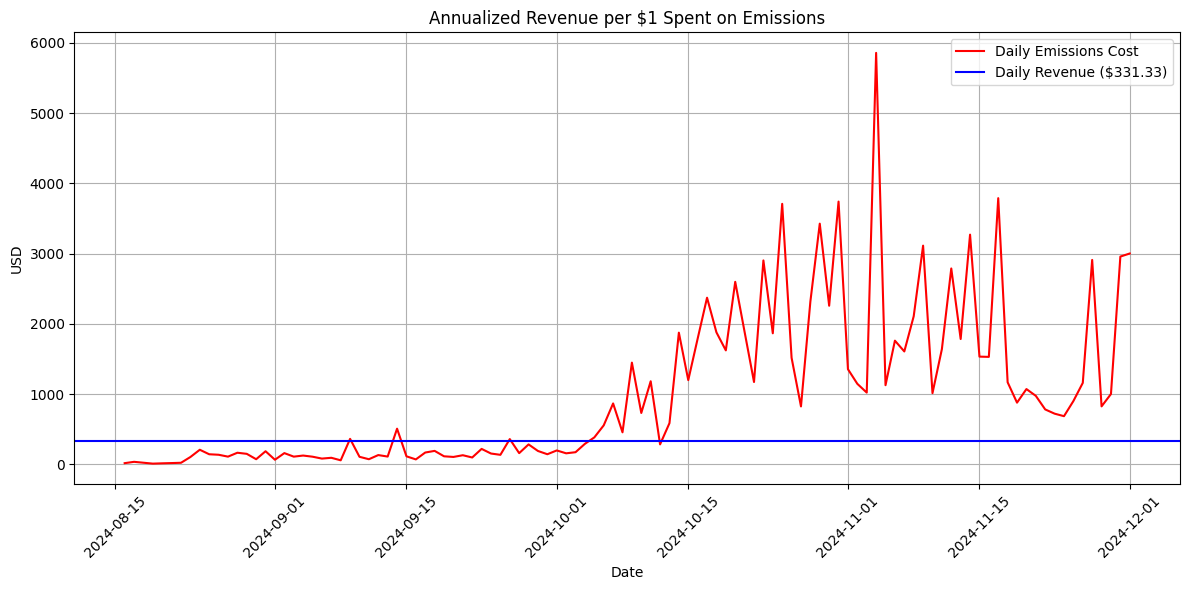

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycoingecko import CoinGeckoAPI

# today's borrow APRs for Base vaults
# TO DO
borrow_aprs = {
    'ionUSDCb': 0.454,  # 45.4%
    'ionWETHb': 0.108,  # 10.8%
    'ionwsuperOETHb': 0.00,  # 0%
    'ionOGNb': 0.00,  # 0%
    'ionsUSDzb': 0.073,  # 7.3%
    'ionUSDzb': 0.072,  # 7.2%
    'ionwUSDplusb': 0.00,  # 0%
    'ionwUSDMb': 0.221,  # 22.1%
    'ionuSOLb': 0.061,  # 6.1%
    'ionuSUIb': 0.076,  # 7.6%
    'ionEURCb': 0.123,  # 12.3%
    'ioncbBTCb': 0.007,  # 0.7%
    'ioneUSDb': 0.291,  # 29.1%
    'ionbsdETHb': 0.09,  # 9%
    'ionhyUSDb': 0.176,  # 17.6%
    'ionezETHb': 0.00,  # 0%
    'ionweETHb': 0.018,  # 1.8%
    'ionAEROb': 0.102,  # 10.2%
    'ionRSRb': 0.002,  # 0.2%
    'ionwstETHb': 0.019,  # 1.9%
    'ioncbETHb': 0.001,  # 0.1%
    'ionUSDplusb': 0.132  # 13.2%
}

# Make copies and filter for Base vaults (ending with 'b')
base_borrows = borrows[borrows['vaultName'].str.endswith('b')].copy()
base_deposits = deposits[deposits['vaultName'].str.endswith('b')].copy()

# Clean and convert numerical data
base_borrows['total_borrowed_in_vault_usd'] = pd.to_numeric(
    base_borrows['total_borrowed_in_vault_usd'].replace('<nil>', np.nan),
    errors='coerce'
).fillna(0)

base_borrows['daily_borrowed_amount_usd'] = pd.to_numeric(
    base_borrows['daily_borrowed_amount_usd'],
    errors='coerce'
).fillna(0)

# Convert dates and set timezone-naive indices
base_borrows.set_index(pd.to_datetime(base_borrows['date']).dt.tz_localize(None), inplace=True)
base_deposits.set_index(pd.to_datetime(base_deposits['date']).dt.tz_localize(None), inplace=True)

# Get ION prices for emissions calculations
start_date = base_daily_emissions['day'].min()
end_date = base_daily_emissions['day'].max()
days = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days + 1

cg = CoinGeckoAPI()
try:
    ion_data = cg.get_coin_market_chart_by_id(
        id='ionic-protocol',
        vs_currency='usd',
        days=days
    )
    ion_prices = pd.DataFrame(ion_data['prices'], columns=['timestamp', 'price'])
    ion_prices['timestamp'] = pd.to_datetime(ion_prices['timestamp'], unit='ms')
    ion_prices.set_index('timestamp', inplace=True)
    ion_prices = ion_prices['price'].resample('D').last()
    ion_prices.index = ion_prices.index.tz_localize(None)
except Exception as e:
    print(f"Error fetching ION price data: {e}")
    raise

# Calculate current day's revenue
recent_day = base_borrows.index.max()
recent_borrows = base_borrows[base_borrows.index == recent_day]

daily_revenue = 0
print("Revenue Calculation Breakdown:")
print("-" * 50)
for _, row in recent_borrows.iterrows():
    vault = row['vaultName']
    amount = row['total_borrowed_in_vault_usd']
    apr = borrow_aprs.get(vault, 0)
    daily_interest = amount * (apr / 365)
    protocol_revenue = daily_interest * 0.1
    daily_revenue += protocol_revenue

    if amount > 0:
        print(f"{vault}:")
        print(f"Borrowed: ${amount:,.2f}")
        print(f"Borrow APR: {apr*100:.1f}%")
        print(f"Daily Protocol Revenue: ${protocol_revenue:.2f}")
        print()

annualized_revenue = daily_revenue * 365

# Calculate emissions cost
emissions_cost = base_daily_emissions.copy()
emissions_cost.index = pd.to_datetime(emissions_cost['day']).dt.tz_localize(None)
emissions_cost['ion_price'] = ion_prices
emissions_cost['emissions_cost_usd'] = emissions_cost['daily_ion_amount'] * emissions_cost['ion_price']

total_emissions = emissions_cost['daily_ion_amount'].sum()
total_emissions_cost = emissions_cost['emissions_cost_usd'].sum()

print("\nKey Metrics Summary:")
print("-" * 50)
print(f"Daily Protocol Revenue: ${daily_revenue:.2f}")
print(f"Annualized Protocol Revenue: ${annualized_revenue:,.2f}")
print(f"\nTotal ION Emissions: {total_emissions:,.2f} ION")
print(f"Total Cost of Emissions: ${total_emissions_cost:,.2f}")
print(f"\nAnnualized Revenue per $1 Spent on Emissions: ${(annualized_revenue/total_emissions_cost):.4f}")

# Create visualization
plt.figure(figsize=(12, 6))
plt.plot(emissions_cost.index, emissions_cost['emissions_cost_usd'],
         label='Daily Emissions Cost', color='red')
plt.axhline(y=daily_revenue, color='blue', linestyle='-',
           label=f'Daily Revenue (${daily_revenue:.2f})')

plt.title('Annualized Revenue per $1 Spent on Emissions')
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Borrow & Supply APRs

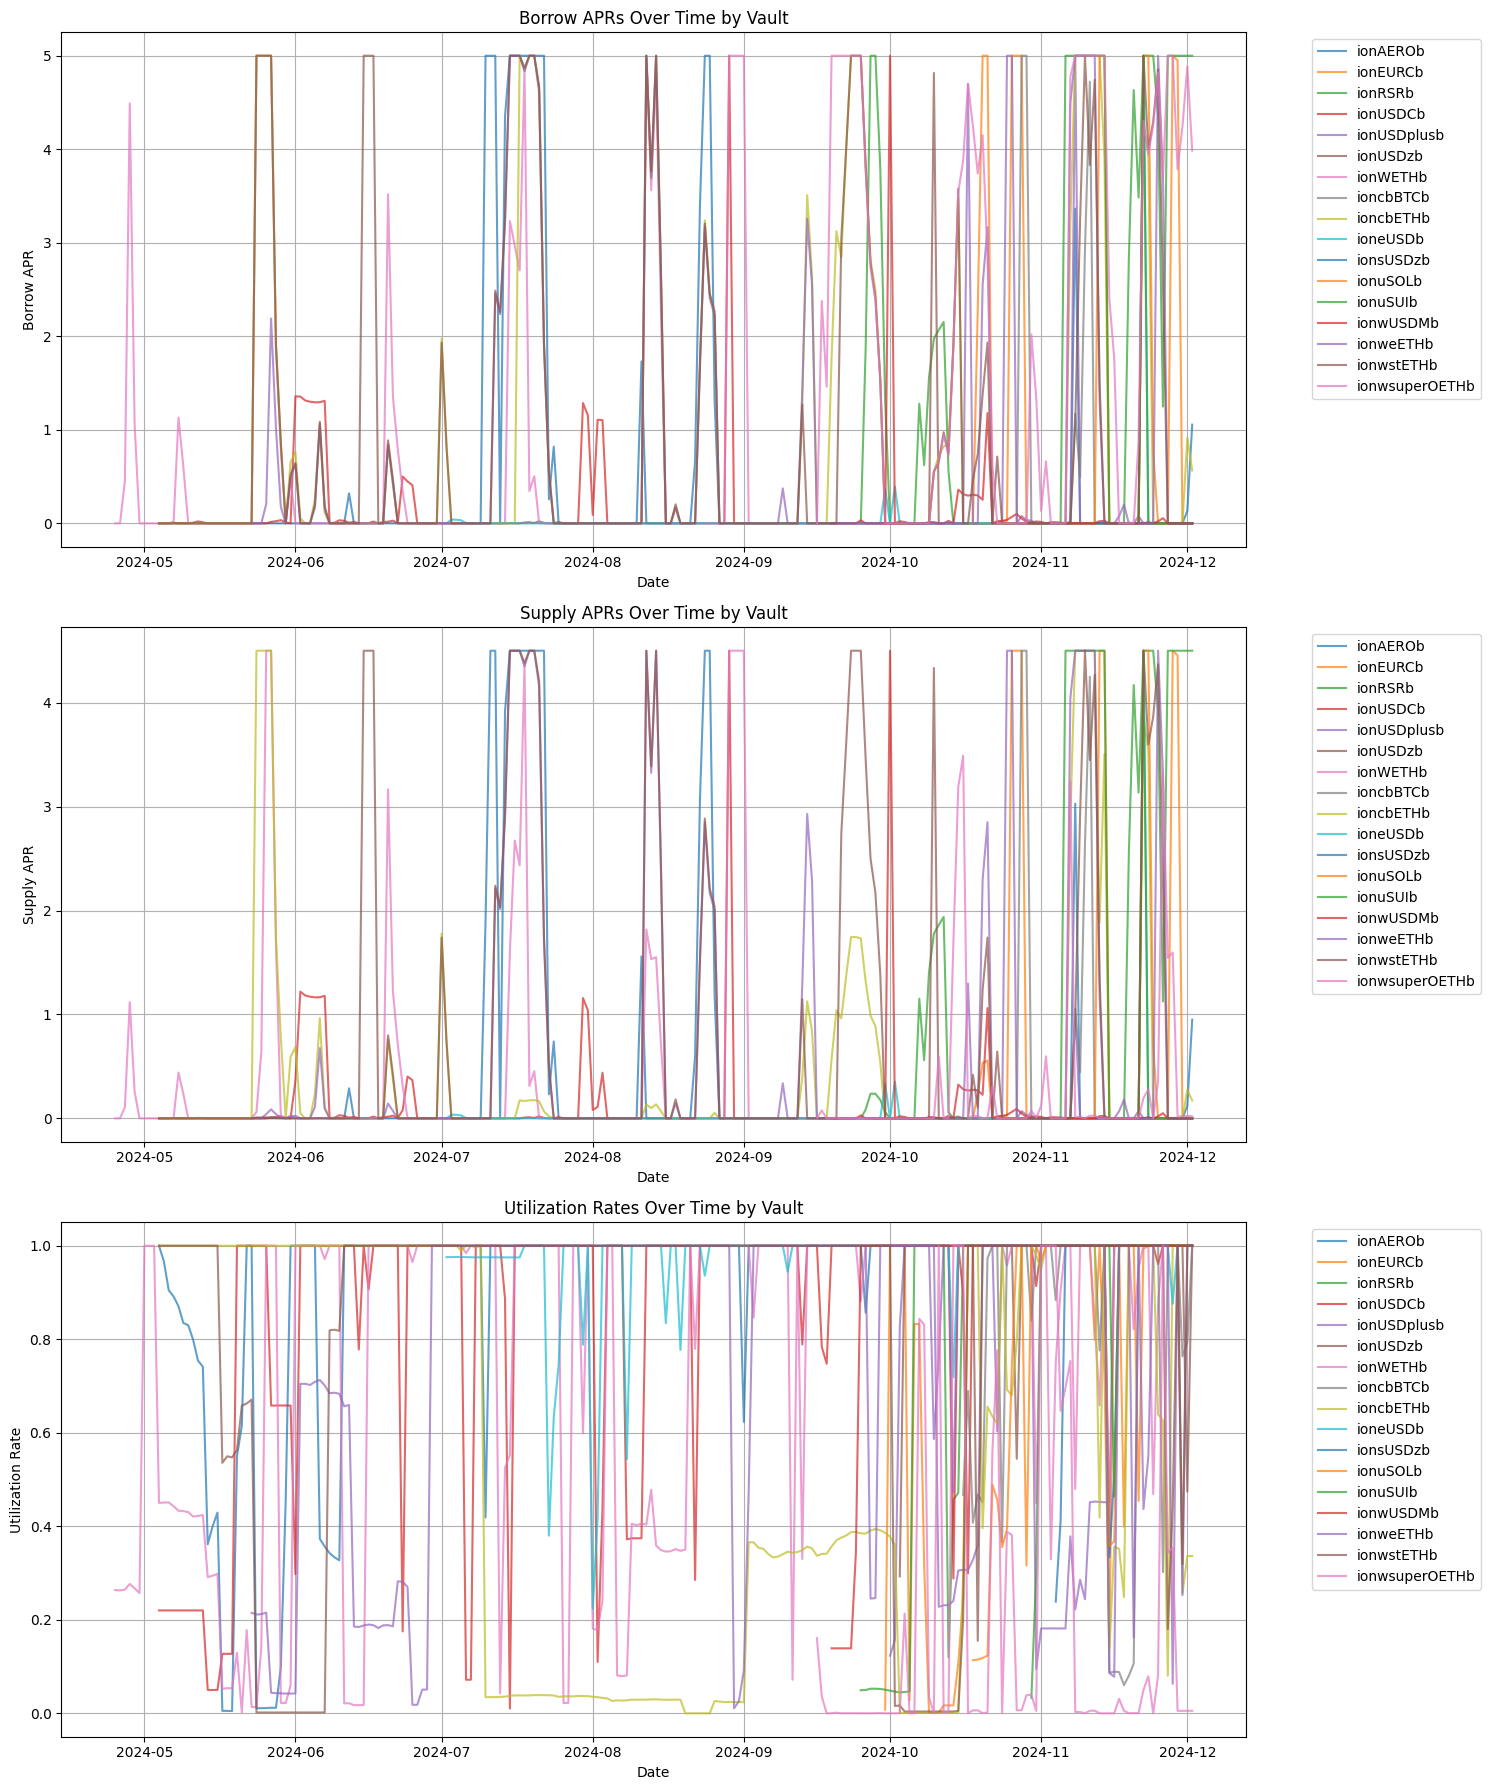


APR Summary Statistics by Vault:
               borrow_apr                    supply_apr               \
                     mean  min     max count       mean  min     max   
vaultName                                                              
ionAEROb           0.3870  0.0  5.0000   213     0.3360  0.0  4.5000   
ionEURCb           0.3912  0.0  5.0000    64     0.3520  0.0  4.5000   
ionRSRb            1.2862  0.0  5.0000    69     0.9411  0.0  4.5000   
ionUSDCb           0.0971  0.0  5.0000   213     0.0746  0.0  4.5000   
ionUSDplusb        0.0875  0.0  5.0000    63     0.0230  0.0  0.9990   
ionUSDzb           0.0789  0.0  4.8152    61     0.0710  0.0  4.3337   
ionWETHb           0.3926  0.0  5.0000   222     0.2453  0.0  4.5000   
ioncbBTCb          0.4025  0.0  5.0000    48     0.3622  0.0  4.5000   
ioncbETHb          0.8581  0.0  5.0000   213     0.3855  0.0  4.5000   
ioneUSDb           0.0381  0.0  5.0000   154     0.0343  0.0  4.5000   
ionsUSDzb          0.0000  0.0

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

def calculate_ionic_aprs(borrows_input, deposits_input):
    # Create copies of input dataframes
    borrows = borrows_input.copy()
    deposits = deposits_input.copy()

    # Convert dates to datetime and ensure all are UTC timezone-aware
    borrows['date'] = pd.to_datetime(borrows['date']).dt.tz_localize('UTC')
    deposits['date'] = pd.to_datetime(deposits['date'])
    if deposits['date'].dt.tz is None:
        deposits['date'] = deposits['date'].dt.tz_localize('UTC')

    # Filter for Base vaults (ending with 'b')
    base_borrows = borrows[borrows['vaultName'].str.endswith('b')].copy()

    # Create daily deposits for each vault by forward filling
    deposits_pivot = deposits.pivot_table(
        index='date',
        columns='vaultName',
        values='mintedAmount_USD',
        aggfunc='sum'
    )
    deposits_pivot = deposits_pivot.ffill()  # Using ffill() instead of fillna(method='ffill')

    # Reset index to get date as column
    deposits_pivot = deposits_pivot.reset_index()

    # Melt back to long format
    deposits_daily = deposits_pivot.melt(
        id_vars=['date'],
        var_name='vaultName',
        value_name='mintedAmount_USD'
    ).fillna(0)

    # Clean numerical data
    base_borrows['total_borrowed_in_vault_usd'] = pd.to_numeric(
        base_borrows['total_borrowed_in_vault_usd'],
        errors='coerce'
    ).fillna(0)

    base_borrows['daily_borrowed_amount_usd'] = pd.to_numeric(
        base_borrows['daily_borrowed_amount_usd'],
        errors='coerce'
    ).fillna(0)

    # Initialize results list
    apr_data = []

    # Calculate APRs for each vault
    for vault in base_borrows['vaultName'].unique():
        if not vault.endswith('b'):
            continue

        vault_borrows = base_borrows[base_borrows['vaultName'] == vault].copy()
        vault_deposits = deposits_daily[deposits_daily['vaultName'] == vault].copy()

        # Sort by date
        vault_borrows = vault_borrows.sort_values('date')

        # Calculate daily changes in borrowed amounts (interest accrued)
        vault_borrows['prev_borrowed'] = vault_borrows['total_borrowed_in_vault_usd'].shift(1)
        vault_borrows['daily_interest'] = (
            vault_borrows['total_borrowed_in_vault_usd'] -
            vault_borrows['prev_borrowed'] -
            vault_borrows['daily_borrowed_amount_usd']
        )

        # Rolling 7-day calculations
        for idx, row in vault_borrows.iterrows():
            current_date = row['date']

            # Skip if no borrows
            if row['total_borrowed_in_vault_usd'] == 0:
                continue

            # Get matching deposit data
            matching_deposits = vault_deposits[vault_deposits['date'] == current_date]

            # If no matching deposits, use last known deposit amount
            if matching_deposits.empty:
                prior_deposits = vault_deposits[vault_deposits['date'] <= current_date]
                total_supplied = prior_deposits['mintedAmount_USD'].iloc[-1] if not prior_deposits.empty else 0
            else:
                total_supplied = matching_deposits['mintedAmount_USD'].iloc[0]

            # Use minimum of 1 for total_supplied to avoid division by zero
            total_supplied = max(total_supplied, 1)

            # Calculate utilization rate
            utilization_rate = min(row['total_borrowed_in_vault_usd'] / total_supplied, 1)

            # Get last 7 days of data
            week_prior = current_date - pd.Timedelta(days=7)
            week_data = vault_borrows[
                (vault_borrows['date'] > week_prior) &
                (vault_borrows['date'] <= current_date)
            ]

            if len(week_data) >= 3:  # Require at least 3 days of data
                weekly_interest = week_data['daily_interest'].sum()
                avg_borrowed = week_data['total_borrowed_in_vault_usd'].mean()

                if avg_borrowed > 0:
                    # Calculate annualized borrow APR
                    borrow_apr = (weekly_interest / avg_borrowed) * (365 / len(week_data))

                    # Apply reasonable bounds
                    borrow_apr = min(max(borrow_apr, 0), 5)  # Cap at 500% APR

                    # Calculate Supply APR
                    protocol_fee = 0.10  # 10% as per docs
                    supply_apr = borrow_apr * utilization_rate * (1 - protocol_fee)

                    apr_data.append({
                        'date': current_date,
                        'vaultName': vault,
                        'borrow_apr': borrow_apr,
                        'supply_apr': supply_apr,
                        'utilization_rate': utilization_rate,
                        'total_borrowed_usd': row['total_borrowed_in_vault_usd'],
                        'total_supplied_usd': total_supplied,
                        'daily_interest_usd': row['daily_interest']
                    })

    # Convert to DataFrame
    apr_df = pd.DataFrame(apr_data)

    if len(apr_df) > 0:  # Only create plots if we have data
        # Create visualizations
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 18))

        # Plot Borrow APRs
        for vault in apr_df['vaultName'].unique():
            vault_data = apr_df[apr_df['vaultName'] == vault].copy()
            ax1.plot(vault_data['date'], vault_data['borrow_apr'],
                    label=f'{vault}', alpha=0.7)

        ax1.set_title('Borrow APRs Over Time by Vault')
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Borrow APR')
        ax1.grid(True)
        ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

        # Plot Supply APRs
        for vault in apr_df['vaultName'].unique():
            vault_data = apr_df[apr_df['vaultName'] == vault].copy()
            ax2.plot(vault_data['date'], vault_data['supply_apr'],
                    label=f'{vault}', alpha=0.7)

        ax2.set_title('Supply APRs Over Time by Vault')
        ax2.set_xlabel('Date')
        ax2.set_ylabel('Supply APR')
        ax2.grid(True)
        ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

        # Plot Utilization Rates
        for vault in apr_df['vaultName'].unique():
            vault_data = apr_df[apr_df['vaultName'] == vault].copy()
            ax3.plot(vault_data['date'], vault_data['utilization_rate'],
                    label=f'{vault}', alpha=0.7)

        ax3.set_title('Utilization Rates Over Time by Vault')
        ax3.set_xlabel('Date')
        ax3.set_ylabel('Utilization Rate')
        ax3.grid(True)
        ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

        plt.tight_layout()
        plt.show()

        #  summary statistics
        print("\nAPR Summary Statistics by Vault:")
        summary_stats = apr_df.groupby('vaultName').agg({
            'borrow_apr': ['mean', 'min', 'max', 'count'],
            'supply_apr': ['mean', 'min', 'max'],
            'utilization_rate': ['mean', 'min', 'max']
        }).round(4)

        print(summary_stats)

    return apr_df

# calc APRs
apr_results = calculate_ionic_aprs(borrows, deposits)

## Total Emissions to $ of Change in Supply/Borrow on Base

In [18]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

def calculate_emissions_metrics(base_daily_emissions, borrows, deposits, sheet_data=None):
    """
    Calculate key metrics around emissions efficiency and capital growth
    """
    # Create copies with distinctive names
    base_borrows_v3 = borrows[borrows['vaultName'].str.endswith('b')].copy()
    base_deposits_v3 = deposits[deposits['vaultName'].str.endswith('b')].copy()
    base_daily_emissions_v3 = base_daily_emissions.copy()

    # Convert string to float for borrowed amounts
    base_borrows_v3['total_borrowed_in_vault_usd'] = pd.to_numeric(base_borrows_v3['total_borrowed_in_vault_usd'], errors='coerce')

    # Convert dates and set timezone-naive indices, dropping original date columns
    base_borrows_v3 = base_borrows_v3.set_index('date').copy()
    base_borrows_v3.index = pd.to_datetime(base_borrows_v3.index)

    base_deposits_v3 = base_deposits_v3.set_index('date').copy()
    base_deposits_v3.index = pd.to_datetime(base_deposits_v3.index)

    base_daily_emissions_v3 = base_daily_emissions_v3.set_index('day').copy()
    base_daily_emissions_v3.index = pd.to_datetime(base_daily_emissions_v3.index)

    # Hardcode emissions start date and get end date
    emissions_start = '2024-08-15'
    emissions_end = base_daily_emissions_v3.index.max().strftime('%Y-%m-%d')

    # Filter borrows data to emissions period
    base_borrows_v3 = base_borrows_v3[
        (base_borrows_v3.index >= emissions_start) &
        (base_borrows_v3.index <= emissions_end)
    ]

    # Calculate total emissions
    total_emissions = base_daily_emissions_v3['daily_ion_amount'].sum()

    # Calculate borrow changes for each vault
    borrow_changes = []
    for vault in base_borrows_v3['vaultName'].unique():
        vault_data = base_borrows_v3[base_borrows_v3['vaultName'] == vault].sort_index()
        if not vault_data.empty:
            # Get earliest non-NaN value for start
            start_data = vault_data[vault_data['total_borrowed_in_vault_usd'].notna()]
            if not start_data.empty:
                start_value = float(start_data['total_borrowed_in_vault_usd'].iloc[0])
                end_value = float(vault_data['total_borrowed_in_vault_usd'].iloc[-1])

                borrow_changes.append({
                    'vaultName': vault,
                    'start': start_value,
                    'end': end_value,
                    'change': end_value - start_value
                })

    borrow_changes = pd.DataFrame(borrow_changes).set_index('vaultName')

    # Calculate daily deposits
    deposits_by_vault = base_deposits_v3.groupby(['vaultName'])['mintedAmount_USD'].sum()
    deposits_by_vault = pd.DataFrame(deposits_by_vault)

    # Calculate deposit changes
    deposit_changes = []
    for vault in deposits_by_vault.index:
        if vault in base_deposits_v3['vaultName'].unique():
            vault_data = base_deposits_v3[base_deposits_v3['vaultName'] == vault]
            deposit_sum = vault_data['mintedAmount_USD'].sum()
            deposit_changes.append({
                'vaultName': vault,
                'start': 0,
                'end': deposit_sum,
                'change': deposit_sum
            })

    deposit_changes = pd.DataFrame(deposit_changes).set_index('vaultName')

    # Calculate total changes
    total_borrow_change = borrow_changes['change'].sum()
    total_deposit_change = deposit_changes['change'].sum()

    # Calculate efficiency metrics
    days_elapsed = (pd.to_datetime(emissions_end) - pd.to_datetime(emissions_start)).days
    daily_emission_rate = total_emissions / days_elapsed if days_elapsed > 0 else 0

    # Calculate emissions per dollar of TVL and borrow change
    emissions_per_deposit_dollar = total_emissions / abs(total_deposit_change) if total_deposit_change != 0 else float('inf')
    emissions_per_borrow_dollar = total_emissions / abs(total_borrow_change) if total_borrow_change != 0 else float('inf')

    # If we have sheet data, calculate weighted averages
    if sheet_data is not None:
        sheet_data_base_v3 = sheet_data[sheet_data['vaultName'].str.endswith('b')].copy()

        # Ensure numeric columns
        numeric_cols = ['Total Supply at Start', 'Total Borrowed at Start', 'Change in Supply %', 'Change in Borrow %']
        for col in numeric_cols:
            sheet_data_base_v3[col] = pd.to_numeric(sheet_data_base_v3[col], errors='coerce')

        # Calculate weights based on starting TVL
        total_start_supply = sheet_data_base_v3['Total Supply at Start'].sum()
        total_start_borrow = sheet_data_base_v3['Total Borrowed at Start'].sum()

        # Avoid division by zero
        if total_start_supply > 0:
            sheet_data_base_v3['supply_weight'] = sheet_data_base_v3['Total Supply at Start'] / total_start_supply
        else:
            sheet_data_base_v3['supply_weight'] = 0

        if total_start_borrow > 0:
            sheet_data_base_v3['borrow_weight'] = sheet_data_base_v3['Total Borrowed at Start'] / total_start_borrow
        else:
            sheet_data_base_v3['borrow_weight'] = 0

        # Calculate weighted average changes
        weighted_supply_change = (sheet_data_base_v3['Change in Supply %'] * sheet_data_base_v3['supply_weight']).sum()
        weighted_borrow_change = (sheet_data_base_v3['Change in Borrow %'] * sheet_data_base_v3['borrow_weight']).sum()
    else:
        weighted_supply_change = None
        weighted_borrow_change = None

    # Prepare results
    results = {
        'Total ION Emissions': total_emissions,
        'Days Analyzed': days_elapsed,
        'Daily Emission Rate': daily_emission_rate,
        'Total Deposit Change ($)': total_deposit_change,
        'Total Borrow Change ($)': total_borrow_change,
        'ION Emissions per $ Deposit Change': emissions_per_deposit_dollar,
        'ION Emissions per $ Borrow Change': emissions_per_borrow_dollar
    }

    if weighted_supply_change is not None:
        results.update({
            'Weighted Average Supply Change (%)': weighted_supply_change,
            'Weighted Average Borrow Change (%)': weighted_borrow_change
        })

    # Create detailed vault-level analysis
    vault_analysis = pd.DataFrame({
        'Deposit Change': deposit_changes['change'],
        'Borrow Change': borrow_changes['change'],
        'Current Deposits': deposit_changes['end'],
        'Current Borrows': borrow_changes['end']
    }).round(2)

    return results, vault_analysis, base_borrows_v3, base_deposits_v3, base_daily_emissions_v3

# Run the analysis
results, vault_analysis, base_borrows_v3, base_deposits_v3, base_daily_emissions_v3 = calculate_emissions_metrics(
    base_daily_emissions,
    borrows,
    deposits,
    sheet_data=None  # Set to None if sheet data is incomplete
)

# Print results
print("\nEmissions Analysis Results:")
print("-" * 50)
for metric, value in results.items():
    if isinstance(value, (int, float)):
        print(f"{metric}: {value:,.2f}")
    else:
        print(f"{metric}: {value}")

print("\nPer-Vault Analysis:")
print("-" * 50)
print(vault_analysis)

results_df = pd.DataFrame(list(results.items()), columns=['Metric', 'Value'])

# Save the results
results_df.to_csv('ionic_emissions_results.csv', index=False)
vault_analysis.to_csv('ionic_vault_analysis.csv')

print("\nResults saved to:")
print("- ionic_emissions_results.csv")
print("- ionic_vault_analysis.csv")


Emissions Analysis Results:
--------------------------------------------------
Total ION Emissions: 2,536,469.26
Days Analyzed: 108.00
Daily Emission Rate: 23,485.83
Total Deposit Change ($): 129,811,421.51
Total Borrow Change ($): 4,376,236.19
ION Emissions per $ Deposit Change: 0.02
ION Emissions per $ Borrow Change: 0.58

Per-Vault Analysis:
--------------------------------------------------
                Deposit Change  Borrow Change  Current Deposits  \
vaultName                                                         
ionAEROb             982589.19      122660.78         982589.19   
ionEURCb            1980241.09       45468.42        1980241.09   
ionOGNb               78757.66            NaN          78757.66   
ionRSRb            10901401.38      167543.80       10901401.38   
ionUSDCb           33736205.77     1702221.81       33736205.77   
ionUSDplusb         1902707.92         833.99        1902707.92   
ionUSDzb            2653594.38      187983.13        2653594.38  